In [20]:
import pandas as pd
import numpy as np

In [21]:
# read csv data into variable
bicycle_data = pd.read_csv('data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [22]:
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


In [23]:
# create column 'Total', which is (East + West) bicycle count
bicycle_data['Total'] = bicycle_data['Fremont Bridge East Sidewalk'] + bicycle_data['Fremont Bridge West Sidewalk']

In [24]:
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


In [25]:
# function to return datetime object from string
bicycle_data['Hour of day'] = pd.DatetimeIndex(bicycle_data['Date']).hour
bicycle_data['Year'] = pd.DatetimeIndex(bicycle_data['Date']).year
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


In [26]:
# Create a dataframe with the subset of data from the year 2016
bicycle_data_2016 = bicycle_data.loc[bicycle_data['Year'] == 2016]
bicycle_data_2016.reset_index(drop = True, inplace = True)
bicycle_data_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day,Year
0,12/31/2016 11:00:00 PM,4.0,4.0,8.0,23,2016
1,12/31/2016 10:00:00 PM,7.0,8.0,15.0,22,2016
2,12/31/2016 09:00:00 PM,4.0,6.0,10.0,21,2016
3,12/31/2016 08:00:00 PM,3.0,6.0,9.0,20,2016
4,12/31/2016 07:00:00 PM,6.0,4.0,10.0,19,2016


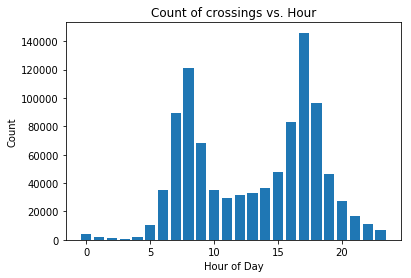

In [44]:
# Use pandas + matplotlib to plot the counts by hour. 
# (i.e. hour of the day on the x-axis, total daily counts on the y-axis)
from matplotlib import pyplot as plt

total_hours = bicycle_data_2016[['Total','Hour of day']].groupby(['Hour of day']).sum()
total_hours.head()
time = list(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Count of crossings vs. Hour')
_ = plt.bar(time, total_hours['Total'])

In [41]:
# Use pandas to determine what is (on average) the busiest hour of the day
avg_hours = (total_hours / bicycle_data_2016[['Total','Hour of day']].groupby(['Hour of day']).count())
avg_hours = np.array(avg_hours)

print('Busiest Hour is: ', np.argmax(avg_hours), ' with ', avg_hours[np.argmax(avg_hours)][0], ' crossings.')

Busiest Hour is:  17  with  399.0327868852459  crossings.
